# Practical Assignment
Apply random forests to Boston data (predict 'medv' variable) and create a plot displaying the test error resulting from random
forests on this data set for a comprehensive range of values for max_features and n_estimators. Describe the results obtained.

In [2]:
# import the necessary packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data , confusion_table
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS
from sklearn.ensemble import RandomForestRegressor as RF

In [3]:
# load the Boston data
Boston = load_data("Boston") # load data
X = Boston.drop(columns='medv').values
y = Boston['medv'].values

In [4]:
# split the dataset into training and testing datasets
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.3,
                               random_state=0)

In [5]:
# Let's evaluate model performance for more features and estimators
feature_list    = range(3,5+1) # from 3 to 6
estimators_list = range(5,500,10)

# preallocate results array
reg_err = np.zeros((len(estimators_list), len(feature_list)))

# estimate regression errors for specified values of max_features and n_estimators
for idx_e, e in enumerate(estimators_list):
    print('Estimators # ' + str(e))
    for idx_f, f in enumerate(feature_list):
        RF_boston = RF(max_features=f,
                       n_estimators=e,
                       random_state=0).fit(X_train , y_train)
        y_hat_RF = RF_boston.predict(X_test)
        reg_err[idx_e, idx_f] = np.mean((y_test - y_hat_RF)**2) 


Estimators # 5
Estimators # 15
Estimators # 25
Estimators # 35
Estimators # 45
Estimators # 55
Estimators # 65
Estimators # 75
Estimators # 85
Estimators # 95
Estimators # 105
Estimators # 115
Estimators # 125
Estimators # 135
Estimators # 145
Estimators # 155
Estimators # 165
Estimators # 175
Estimators # 185
Estimators # 195
Estimators # 205
Estimators # 215
Estimators # 225
Estimators # 235
Estimators # 245
Estimators # 255
Estimators # 265
Estimators # 275
Estimators # 285
Estimators # 295
Estimators # 305
Estimators # 315
Estimators # 325
Estimators # 335
Estimators # 345
Estimators # 355
Estimators # 365
Estimators # 375
Estimators # 385
Estimators # 395
Estimators # 405
Estimators # 415
Estimators # 425
Estimators # 435
Estimators # 445
Estimators # 455
Estimators # 465
Estimators # 475
Estimators # 485
Estimators # 495


Features # 3
Features # 4
Features # 5


Text(0, 0.5, 'Regression Error')

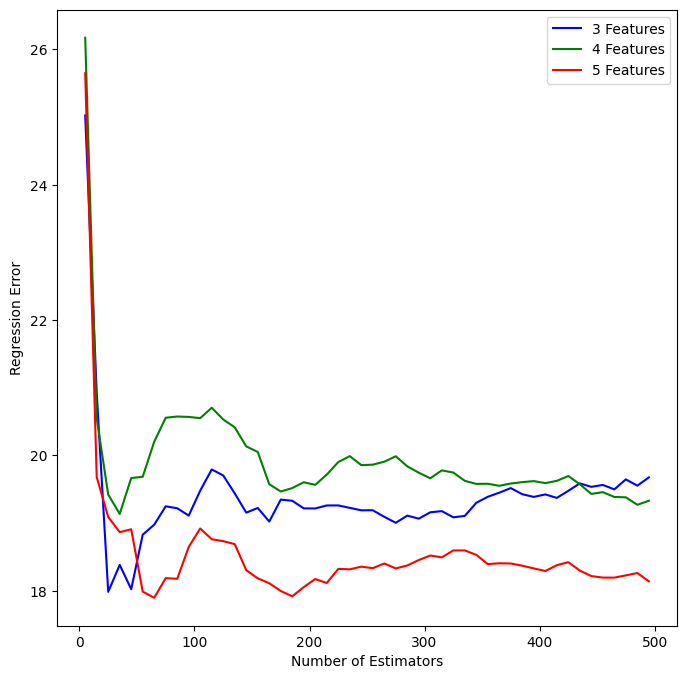

In [6]:
# let's plot the results
# I want to plot a line for feature number in coordinates of estimators number and regression error
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r']

ax = subplots(figsize=(8,8))[1]

for idx_f, f in enumerate(feature_list):
    print('Features # ' + str(f))
    ax.plot(estimators_list ,
            reg_err[:,idx_f] ,
            color_list[idx_f] ,
            label=str(f) + ' Features')

ax.legend();
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Regression Error')

1. Initially, increase of the tree number leads to reduction of regression error. Though after 70-80 trees used, the regression error doesn't reduce anymore and often increases. Thus, there is no need to use more than 100 estimators for this dataset to get optimal predictions.
2. The more features I use, the lower the regression error is. Increase in feature number imprves the model predictions.
3. For this dataset, I get the most precise predictions when using 5 features and ~70 of random trees.